In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

# Lecture 3
## Stationarity, ACF and PACF

### Stochastic Process and Stationarity
- Stochastic process is family of time indexed random variables
- $Z(\omega, t) : t = 0, 1, 2,$ where $\omega$ is  the sample set and t is the index set
- time series is a sample function from a stochastic process $X_t, t = 1, 2, T$
- Is said to be weak or covariance stationary if it has a constant mean
  
    $E(X_t) = \mu$
    
  constant variance

    $Var (X_t) = E(X_t - \mu)^2 = \sigma^2$
    
  and cov and corr between X depend only on time difference K

  $ \rho_k = \frac{\gamma_k}{\gamma_0} = \frac{Cov (X_t, X_t-k)}{\sigma_x^2}$

- Distribution if stationary does not depend on time t but only on time difference k $(X_t, X_t-1, X_t-2...)$

### Autocorrelation Function (ACF)
Main properties of ACF are:
1. $\rho_0 = 1  \because \gamma_0 = \frac{Var(X_t)}{Var(X_T)}$ 
2. $\mid \gamma_k \mid \le \gamma_0; \mid \rho_k \mid \le \rho_0$
3. $\gamma_k = \gamma_-k; \rho_k = \rho_-k$
4. Are symmetric around 0; so you dont need to define the funciton (-k) $\because$ time diff is same
5. $\gamma_k$ and $\rho_k$ are PSD
   - $\sum \sum \alpha_i \alpha_j \gamma_{\mid t_i - t_j\mid} \ge 0$
   - $\sum \sum \alpha_i \alpha_j \rho_{\mid t_i - t_j\mid} \ge 0$
    for any $t_1, t_2, ... t_n$, and real numbers $\alpha_1, \alpha_2...\alpha_n$
     
### Partial Autocorrelation Function (PACF)
- PACF measures the correlation between $X_t$ and $X_{t-k}$ when the intermediate variables are removed
  - $Cor(X_T, X_{t-k} \mid X_{t-1}, X_{t-2},... X_{t-k+1}$
- Removes the effect of the intermediate variables (linear dependancy)
PACF of order k is denoted by $\phi_kk$ and can be obtained by regressing $X_t$ and $X_{t-k}$
- $X_t = \phi_{k1}X_{t-1} + \phi_{k2}X_{t-2} +... \phi_{kk}X_{t-k} + a_t$ 
- a is error time
- $E(X_tX_{t-j}) = \phi_{k1}E(X_{t-1}X_{t-j}) + ... \phi_{kk}E(X_{t-1}X_{t-j}) + E(a_tX_{t-j})$ 
  
  $\Rightarrow \gamma_j = \phi_{k1}\gamma{j-1} + ... \phi_{kk}\gamma{j-k}$
  - dividing by $\gamma_0$ we get;
  
 - $\rho_j = \phi_{k1}\rho_{j-1} ... + \phi_{kk}\rho_{j-k}$

#### Cramer Rule
$x_i = \frac{det(A_i)}{det A}$

where subscript represents which column is replaced by rightside column vector

$\phi_{22} =
  \left[ {\begin{array}{cc}
    a_{11} \\
    a_{21} \\
  \end{array} } \right]
$


##### Sample ACF
- $\hat{\rho_k} = \frac {\hat{\gamma_k}}{\hat{\gamma_K}} = \frac{\sum^{n_k}_{t=1} (X_t - \bar{X})(X_{t-k} - \bar{X}) }{\sum(X_t - \bar{X})^2}$
  

##### Sample PACF


- $\hat{\phi_{22}} = \frac{\hat{\rho_2} - \sum_{j=1}^1\hat{\phi_{1j}}\hat{\rho_{2-j}}}{1 - \sum_{j=1}^1\hat{\phi_{1j}}\hat{\rho_j}}$

  $= \frac{\hat{\rho_2} - \hat{\phi_{11}}\hat{\rho_{1}}}{1 - \hat{\phi_{11}}\hat{\rho_1}}$
  $= \frac{\hat{\rho_2} - \hat{\rho_{1}}^2} {1 - \hat{\rho_1}^2}$

  




## Understanding PACF and ACF Plots
- They are used to figure out the order of ar ma and arma models
- 

In [22]:
data = pd.Series(np.array([65, 78, 75, 102, 91, 115, 105, 135, 121, 156]))
data.describe()


count     10.000000
mean     104.300000
std       28.452885
min       65.000000
25%       81.250000
50%      103.500000
75%      119.500000
max      156.000000
dtype: float64

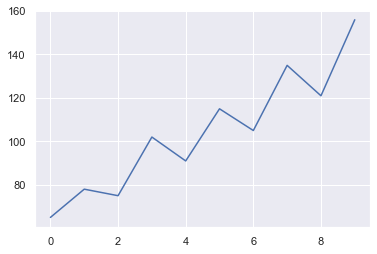

In [29]:
sns.lineplot(data=data)
sns.set_theme()

In [24]:
#tsaplots.plot_pacf(data, lags = 2)
for i in range (1,4):
    print(sm.tsa.acf(data, nlags=i))
    print(sm.tsa.pacf(data, nlags=i))


[1.         0.43437642]
[1.         0.48264046]
[1.         0.43437642 0.47969696]
[1.         0.48264046 0.47803333]
[ 1.          0.43437642  0.47969696 -0.00938362]
[ 1.          0.48264046  0.47803333 -0.66779182]


/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


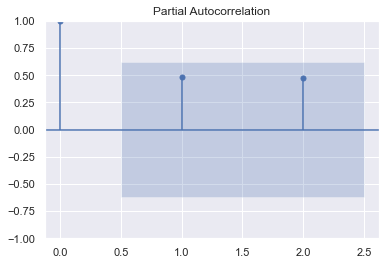

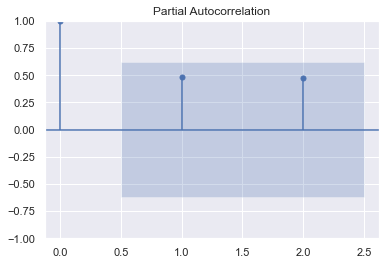

In [30]:
tsaplots.plot_pacf(data, lags = 2)